In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import nltk

In [39]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [55]:
df_train.keyword.value_counts().shape

(221,)

In [59]:
df_train.teste.value_counts().shape

(167,)

In [56]:
stemmer = nltk.LancasterStemmer()

In [57]:
df_train["teste"] = df_train.keyword.apply(lambda x: stemmer.stem(str(x)))

In [58]:
df_train[100:]

,id,keyword,location,text,target,teste
100,144,accident,UK,.@NorwayMFA #Bahrain police had previously die...,1,accid
101,145,accident,"Nairobi, Kenya",I still have not heard Church Leaders of Kenya...,0,accid
102,146,aftershock,Instagram - @heyimginog,@afterShock_DeLo scuf ps live and the game... cya,0,aftershock
103,149,aftershock,304,'The man who can drive himself further once th...,0,aftershock
104,151,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/yN...,0,aftershock
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,nan
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,nan
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,nan
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,nan


In [60]:
for value in df_train.keyword.value_counts().keys():
    if "%" in value:
        print(value)

body%20bags
oil%20spil
burning%20buildings
cliff%20fall
nuclear%20react
dust%20storm
airplane%20accident
bridge%20collaps
emergency%20plan
buildings%20burning
suicide%20bomb
structural%20failure
loud%20bang
nuclear%20disast
natural%20disaster
heat%20wave
body%20bag
violent%20storm
fire%20truck
mass%20murder
blew%20up
blown%20up
body%20bagging
emergency%20services
suicide%20bombing
buildings%20on%20fire
chemical%20emergency
mass%20murderer
forest%20fires
wild%20fires
suicide%20bomber
first%20responders
bush%20fires
war%20zone
forest%20fire
radiation%20emergency


In [61]:
df_train.drop("location", axis=1, inplace=True)
df_test.drop("location", axis=1, inplace=True)

In [62]:
targets_per_word = pd.DataFrame(columns = [0,1])
df_train.keyword = df_train.teste

In [64]:
for value in df_train.keyword.value_counts(dropna=False).keys():
    if pd.isna(value):
        target = df_train[df_train.keyword.isna()].target.value_counts(dropna=False)
        df_target = pd.DataFrame(dict(target), index = ["Não especificado"])
    else:
        target = df_train[df_train.keyword == value].target.value_counts()
        df_target = pd.DataFrame(dict(target), index = [value])
#         n_location = len(df_train[df_train.keyword == value].location.value_counts().values)
#         max_location = df_train[df_train.keyword == value].location.value_counts().values.max()
#         if max_location > n_location:
#             print("Localização importante")
#             print(df_train[df_train.keyword == value].location.value_counts())
    targets_per_word = targets_per_word.append(df_target)

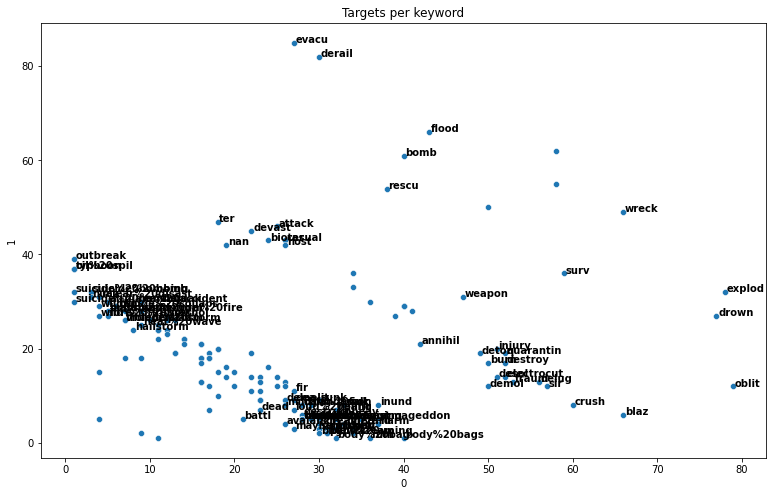

In [65]:
targets_per_word = targets_per_word.rename(columns = {0:"0", 1:"1"})
plt.figure(figsize=(13,8))
sns.scatterplot(data=targets_per_word,x="0",y="1")
plt.title("Targets per keyword") #title
plt.xlabel("0") #x label
plt.ylabel("1") #y label
for line in range(1,targets_per_word.shape[0]):
    if statistics.stdev([targets_per_word["0"][line], targets_per_word["1"][line]]) >10:
        plt.text(targets_per_word["0"][line]+0.2, targets_per_word["1"][line], targets_per_word.index[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.show()